In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline

import glob


In [2]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [3]:
src_meta = '../../gutenberg/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [4]:
# Load meta data

In [5]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

# Time

In [6]:
list_t = np.arange(1800,1900,20)
dt=5
list_t = np.append(list_t,-1)
print(list_t)
list_books = []

lang = 'en'
for t in list_t:
    meta.reset()
    meta.filter_lang(lang,how='only')
    if t==-1:
        pass
    else:
        meta.filter_year([t-dt,t+dt])
#         meta.filter_year(t)

    books_tmp = meta.get_ids()
    list_books += [books_tmp]

[1800 1820 1840 1860 1880   -1]


In [7]:
[len(h) for h in list_books]

[1365, 3061, 6416, 11354, 17913, 46330]

In [8]:
arr_alpha = np.array([0.0,1.0,2.0])
Npair = 100
weights = False ## standard 1/2,1.2
normalized = True ## 0<=divergence <=1

path_read = '../../gutenberg/data/counts/'

list_jsdalpha = []
list_labels = []
for i_t,t in enumerate(list_t):
    print(t)
    list_jsd_tmp = []
    books_tmp=list_books[i_t]
    for i_Npair in range(Npair):
        
        book_sel = True
        while book_sel== True:

            pg1,pg2 = np.random.choice(books_tmp,replace=False,size=2)
            fname_read = '%s_counts.txt'%(pg1)
            filename1 = os.path.join(path_read,fname_read)

            fname_read = '%s_counts.txt'%(pg2)
            filename2 = os.path.join(path_read,fname_read)
            
            if os.path.isfile(filename1) and os.path.isfile(filename2):
                book_sel = False
        jsd = jsdalpha(filename1,filename2,alpha=arr_alpha,weights=weights,normalized=normalized)
        list_jsd_tmp += [jsd]
    list_jsdalpha += [list_jsd_tmp]

1800
1820
1840
1860
1880
-1


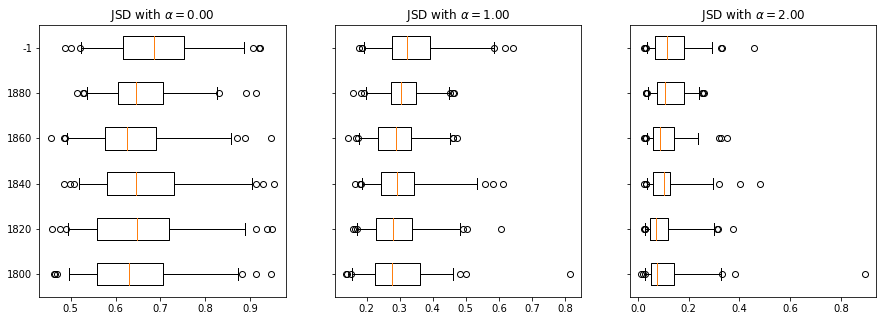

In [9]:
f=plt.figure(figsize = (15,5))
for i_alpha,alpha in enumerate(arr_alpha):
    ax=f.add_subplot(1,3,i_alpha+1)
    list_jsd_plot = [ [h[i_alpha] for h in jsd_tmp] for jsd_tmp in list_jsdalpha ]

    _ =ax.boxplot(list_jsd_plot,vert=False,whis=[2.5,97.5],labels=list_t)
    _ = ax.set_title(r'JSD with $\alpha = %.2f$'%(alpha))
    
    if i_alpha>0:
        ax.set_yticklabels([])
#     ax.set_xlim(0,1)

# t1 vs t2

In [10]:
list_t = np.arange(1800,1900,20)
dt=5
print(list_t)
list_books = []

lang = 'en'
for t in list_t:
    meta.reset()
    meta.filter_lang(lang,how='only')
    if t==-1:
        pass
    else:
        meta.filter_year([t-dt,t+dt])
        
    books_tmp = meta.get_ids()
    list_books += [books_tmp]

[1800 1820 1840 1860 1880]


In [11]:
alpha = 1.
Npair = 1000
weights = False ## standard 1/2,1.2
normalized = True ## 0<=divergence <=1

path_read = '../../gutenberg/data/counts/'

list_jsdalpha = []
list_labels = []

T=len(list_t)
jsd_mu = np.zeros((T,T))
jsd_std = np.zeros((T,T))

for i_t1,t1 in enumerate(list_t):
    for i_t2,t2 in enumerate(list_t):
        if t1<t2:
            mu=np.nan
            std=np.nan
        else:
            
#             print(t1,t2)
            books_tmp1=list_books[i_t1]
            books_tmp2=list_books[i_t2]
            list_jsd_tmp = []
            for i_Npair in range(Npair):

                book_sel = True
                while book_sel== True:

                    pg1 = np.random.choice(books_tmp1)#,replace=False,size=1)
                    pg2 = np.random.choice(books_tmp2)#,replace=False,size=1)
                    fname_read = '%s_counts.txt'%(pg1)
                    filename1 = os.path.join(path_read,fname_read)

                    fname_read = '%s_counts.txt'%(pg2)
                    filename2 = os.path.join(path_read,fname_read)

                    if os.path.isfile(filename1) and os.path.isfile(filename2):
                        book_sel = False
                jsd = jsdalpha(filename1,filename2,alpha=arr_alpha,weights=weights,normalized=normalized)
                list_jsd_tmp += [jsd]
                
            mu = np.mean(list_jsd_tmp)
            std = np.std(list_jsd_tmp)
        jsd_mu[i_t1,i_t2] = mu
        jsd_std[i_t1,i_t2] = std

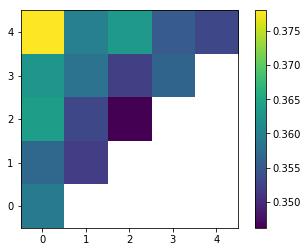

In [12]:
Z = jsd_mu
plt.imshow(Z,origin='lower')
plt.colorbar()

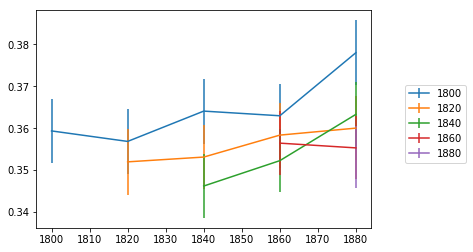

In [13]:
for i_t1,t1 in enumerate(list_t):
    x = list_t
    y = jsd_mu[:,i_t1]
    yerr=jsd_std[:,i_t1]/np.sqrt(Npair)
    plt.errorbar(x,y,yerr=yerr,label=t1)
plt.legend(loc=(1.1,0.3))        